# Pearson $\chi^{2}$ test

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import ncx2
from scipy.optimize import minimize
%matplotlib inline

## SciPy minimization

The function that we'll minimize

In [82]:
def parabola(x):
    y = (x-2.0)**2.0 + 1
    return y

In [83]:
x = np.linspace(-5.0, 5.0, 100)
y = parabola(x)

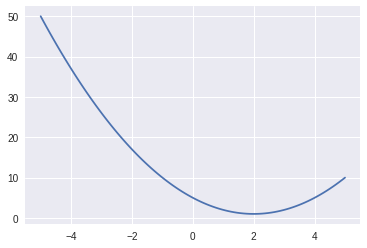

In [84]:
plt.plot(x,y)

Perform minimzation with default settings

In [46]:
m = minimize(parabola, [3])

Results of the minimization

In [142]:
def display_minimization_result(m):
    print("m['success']: ", m['success'])
    print("m['fun']: ",     m['fun'])
    print("m['x']: ",       m['x'])

In [143]:
display_minimization_result(m)

m['success']:  True
m['fun']:  10.9903912942
m['x']:  [ 2.3863477   1.16653702]


In [113]:
data = {}

## Minimization of the sum of relative squared deviations

### Domain

In [114]:
nspacing = 100
x = np.linspace(0.0, 5.0, nspacing)
data['x'] = x

### True signal (straigth line)

Parameters

In [115]:
a = 2.4
b = 1.1

In [116]:
signal = a*x + b

### Noise (Gaussian)

Parameters

In [117]:
mean = 0.0
std  = 0.3

In [118]:
noise = np.random.normal(mean, std, nspacing)

In [145]:
data['y']   = signal + noise
data['err'] = std

Figure

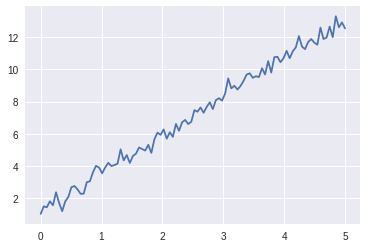

In [146]:
plt.plot(x, data['y'])

## Generate data

In [173]:
def generate_data(a, b, noise_mean, noise_std):
    x  = np.linspace(0.0, 5.0, nspacing)
    signal = a*x + b
    noise = np.random.normal(noise_mean, noise_std, nspacing)
    data['x'] = x
    data['y'] = signal + noise
    data['err'] = noise_std
    return data

## Our data model

In [148]:
def data_model(x, a, b):
    y = a*x + b
    return y

### Test

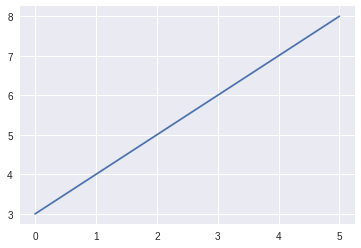

In [149]:
y_model = model(x, a=1.0, b=3.0)
plt.plot(x, y_model)

## Constructing the sum of relative squared deviations

In [150]:
def sum_of_rel_deviation(y_obs, y_predicted, error):
    rel_deviation = (y_obs-y_predicted)**2/error**2
    S = np.sum(rel_deviation)
    return S

In [151]:
sum_of_rel_deviation(data['y'], y_model, error=1.0) 

685.98099611819339

In [156]:
def calc_sum_of_rel_deviation_for_model(model_params, model, data ):
    y_predicted = model(data['x'], *model_params)
    S = sum_of_rel_deviation(data['y'], y_predicted, data['err'])
    return S

In [157]:
initial_guess_a = 5.0
initial_guess_b = 3.0

In [158]:
m = minimize(calc_sum_of_rel_deviation_for_model, [initial_guess_a, initial_guess_b], method = 'Nelder-Mead', args=(data_model,data))

In [155]:
display_minimization_result(m)

m['success']:  True
m['fun']:  122.115458825
m['x']:  [ 2.3863477   1.16653702]


In [164]:
a = 1.0
b = 3.0
noise_mean = 0.0
noise_std  = 0.3

In [165]:
initial_guess_a = 5.0
initial_guess_b = 3.0

In [178]:
def get_sum_of_rel_deviation():
    data = generate_data(a, b, noise_mean, noise_std)
    m = minimize(calc_sum_of_rel_deviation_for_model, [initial_guess_a, initial_guess_b], method = 'Nelder-Mead', args=(data_model,data))
    return m['fun']

In [179]:
get_sum_of_rel_deviation()

99.184544888003401

In [183]:
S_ensemble = [get_sum_of_rel_deviation() for i in range(10000)]

In [185]:
S_x = np.linspace(60.0, 200.0, 200)
S_y = chi2.pdf(S_x, 98)

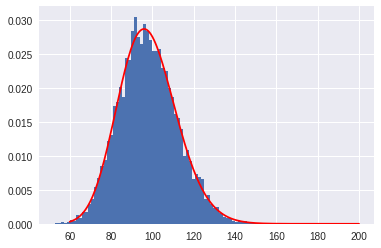

In [188]:
plt.hist(S_ensemble, bins=70, normed=True, histtype="stepfilled")
plt.plot(S_x, S_y, c='r')